In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
path= '/Users/shubpuri/Downloads/test_data_analyst/marketing.csv'

In [36]:
data = pd.read_csv(path)
df = data

In [39]:
df.shape

(10037, 16)

In [41]:
df.describe()

,Unnamed: 0,DoW,channel_code
count,10037.00000,1856.000000,1856.000000
mean,5018.00000,2.529634,2.631466
std,2897.57666,1.937900,1.211340
min,0.00000,0.000000,1.000000
25%,2509.00000,1.000000,2.000000
50%,5018.00000,2.000000,2.000000
75%,7527.00000,4.000000,3.000000
max,10036.00000,6.000000,5.000000


In [45]:
data.dtypes

Unnamed: 0                int64
user_id                  object
date_served              object
marketing_channel      category
variant                category
converted              category
language_displayed     category
language_preferred     category
age_group              category
date_subscribed          object
date_canceled            object
subscribing_channel    category
is_retained            category
DoW                     float64
channel_code            float64
is_correct_lang        category
dtype: object

In [44]:
#Transforming variables into Categorical variables just for easy analysis.
col_names=['marketing_channel','variant','converted', 'language_displayed',
           'language_preferred','age_group', 'subscribing_channel', 'is_retained', 'is_correct_lang']
for col in col_names:
    df[col] = df[col].astype('category',copy=False)


In [47]:
#Checking null values in the data.
df.isna().sum().sort_values(ascending=False)


date_canceled          9460
channel_code           8181
DoW                    8181
subscribing_channel    8181
date_subscribed        8181
date_served              16
marketing_channel        15
is_correct_lang           0
is_retained               0
age_group                 0
language_preferred        0
language_displayed        0
converted                 0
variant                   0
user_id                   0
Unnamed: 0                0
dtype: int64

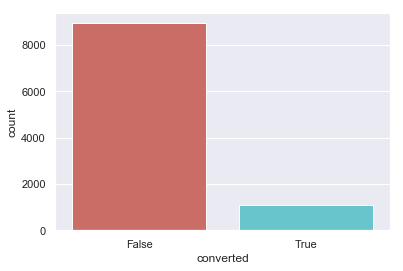

In [184]:
#Univariate Analysis for the variable converted
sns.countplot(x='converted', data=df, palette='hls')
plt.show()
#Over 8500 observations in the data are not being converted while only less than 1500 observations are being converted.

In [193]:
df['converted'].value_counts()

False    8946
True     1091
Name: converted, dtype: int64

In [ ]:
#### Bi-variate Analysis of the variable 'converted' with other variables ####


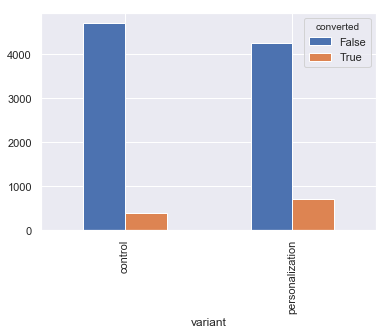

In [189]:
pd.crosstab(data.variant,data.converted).plot(kind='bar')
#if the variant is personalized, there's a higher conversion rate than if the variant is control.

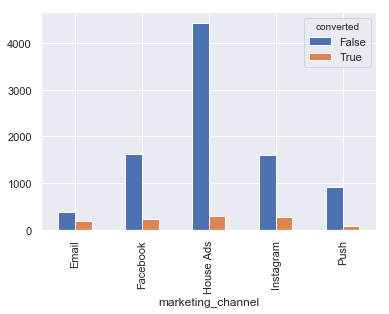

In [86]:
#marketing_channel VS converted
%matplotlib inline
pd.crosstab(data.marketing_channel,data.converted).plot(kind='bar')

#Since the below graph is has a different range for each category count, it is difficult to determine which 
#marketing channel is doing better than the other. So, we normalize each category into a same range between 0-1

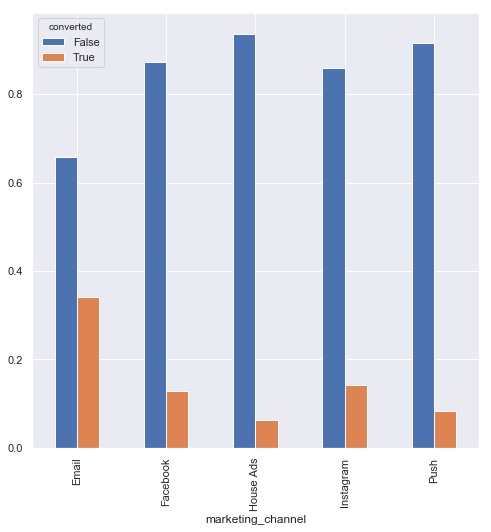

In [146]:
#NORMALIZATION 
pd.crosstab(df["marketing_channel"], 
                          df["converted"]).apply(lambda r: r/r.sum(),axis=1).plot(kind="bar", figsize=(8,8))

#We can see that even though House ads has more conversion counts but Email has more conversion rate after normalizing it with respect to Non-conversions.

In [190]:
#Language_displayed
pd.crosstab(data.language_displayed,data.converted)
#Since there are hardly any records for any other languages other than English, there is no point of interpretting the analysis as there is a skew in the data.

converted,False,True
language_displayed,,
Arabic,15,12
English,8791,1002
German,28,53
Spanish,112,24


In [153]:
#language_preferred
pd.crosstab(data.language_preferred,data.converted)
#Just as language_displayed, this variable is skewed with maximum records for English. So there is not enough data to interpret any results from this analysis.

converted,False,True
language_preferred,,
Arabic,126,19
English,8298,977
German,108,59
Spanish,414,36


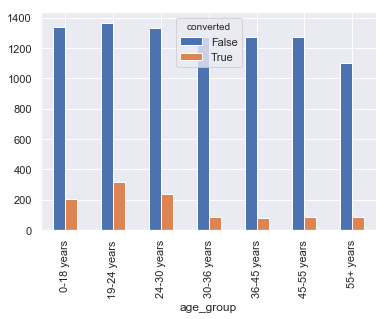

In [156]:
#Age_group
pd.crosstab(data.age_group,data.converted).plot(kind='bar')
#It is hard to say which age group's conversion rate is better than the other so we normalize the conversion and non-conversion rates.

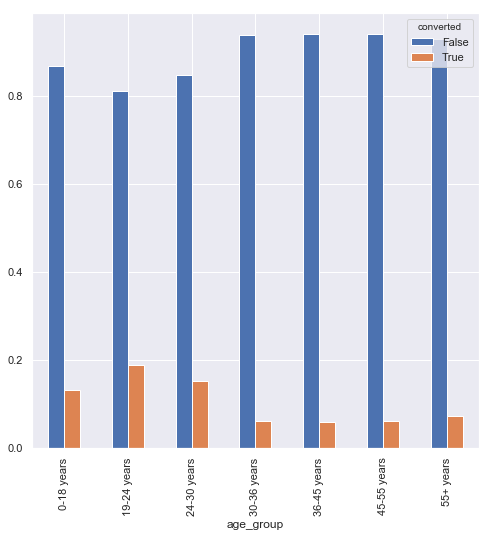

In [195]:
#Normalizing the age_group
pd.crosstab(data.age_group,data.converted).apply(lambda r: r/r.sum(),axis=1).plot(kind="bar", figsize=(8,8))
#we see that, age group 19-24 has the most conversion rate.

In [191]:
#Chi-square test
df_cat=df.select_dtypes(include=['category'])

In [192]:
#Now we check Categorical variables that are statistically significant( p-value < 5% )
#We are doing this test to check if there is any variable whose presence does not affect the conversion rate at all.
from scipy.stats import chisquare
import scipy.stats as stats
for series in df_cat:
    nl = "\n"
    crosstab = pd.crosstab(df_cat[f"{series}"], df_cat['converted'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
 


converted          False  True
marketing_channel             
Email                372   193
Facebook            1623   237
House Ads           4435   298
Instagram           1606   265
Push                 910    83 

Chi2 value= 457.40324320207543
p-value= 1.0897121607947577e-97
Degrees of freedom= 4

converted        False  True
variant                     
control           4705   386
personalization   4241   705 

Chi2 value= 114.58099293038211
p-value= 9.721344882433239e-27
Degrees of freedom= 1

converted  False  True
converted             
False       8946     0
True           0  1091 

Chi2 value= 10026.680883027357
p-value= 0.0
Degrees of freedom= 1

converted           False  True
language_displayed             
Arabic                 15    12
English              8791  1002
German                 28    53
Spanish               112    24 

Chi2 value= 290.8771830218818
p-value= 9.37783457008251e-63
Degrees of freedom= 3

converted           False  True
language_preferred    

In [179]:
#Through the Chi-squared test, we can see that all the categorical variables are statistically significant as p-val< 0.05.

In [ ]:
##RESULTS OF ANALYSIS##

In [196]:
The Univariate analysis tell us that almost 89% of the observations are Not being converted.
Bi-variate Analysis:
   1. If the variant is personalized instead of control, the conversion rate increases.
   2. Marketing channel Email has the highest conversion rate while house ads have the lowest conversion rate
   3. The language variables do not hold enough data on other languages to infer any conclusions out of it.
   4. Age group 19-24 has the highest conversion rate while the age group 36-45 has the lowest conversion rate.
   5. All the variables are significant in changing the state of conversion however, right now there are many NAs in the dataset and after removal, the results might differe for some variables.


SyntaxError: invalid syntax (<ipython-input-196-138314cd84fd>, line 1)

In [ ]:
Q1. In order to improve the conversion rate, the marketing team should focus on the categories which are doing well.
    Such as, boosting the email marketing channel more than the house ads in order to use resources more efficiently.
    Increasing the conversion rate by concentrating on the dominating age group more (but not neglecting the other groups) and creating custom market strategies for various age groups.

Q2. According to the pattern, house ads and push marketing showed the lowest conversion rate in january. One of the reason for this
could be the extreme winter climate during january month where people don't tend to stay out of their houses for long durations. Therefore, social media marketing strategy might be more effective during that month.